# Clean & Analyze Social Media

## Introduction

Social media has become a ubiquitous part of modern life, with platforms such as Instagram, Twitter, and Facebook serving as essential communication channels. Social media data sets are vast and complex, making analysis a challenging task for businesses and researchers alike. In this project, we explore a simulated social media, for example Tweets, data set to understand trends in likes across different categories.

## Prerequisites

To follow along with this project, you should have a basic understanding of Python programming and data analysis concepts. In addition, you may want to use the following packages in your Python environment:

- pandas
- Matplotlib
- ...

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Scope

The objective of this project is to analyze tweets (or other social media data) and gain insights into user engagement. We will explore the data set using visualization techniques to understand the distribution of likes across different categories. Finally, we will analyze the data to draw conclusions about the most popular categories and the overall engagement on the platform.

## Step 1: Importing Required Libraries

As the name suggests, the first step is to import all the necessary libraries that will be used in the project. In this case, we need pandas, numpy, matplotlib, seaborn, and random libraries.

Pandas is a library used for data manipulation and analysis. Numpy is a library used for numerical computations. Matplotlib is a library used for data visualization. Seaborn is a library used for statistical data visualization. Random is a library used to generate random numbers.

In [6]:
import pandas as pd
import numpy as np
import random

In [7]:
#Define the categories
categories = ['Food', 'Travel', 'Fashion', 'Fitness', 'Music', 'Culture', 'Family', 'Health']

In [8]:
#Number of entries (n)
n = 90000

In [9]:
#Generate random data
data = {
    'Date': pd.date_range('2015-01-01', '2023-12-31', periods = n),
    'Category': [random.choice(categories) for _ in range(n)],
    'Likes': np.random.randint(0, 10000, size = n),
    'Shares': np.random.randint(0, 1000, size = n),
    'Reposts': np.random.randint(0, 200, size = n),
    'Comments': np.random.randint(0, 10000, size = n)
}

In [10]:
#Create a dataframe
df = pd.DataFrame(data)

In [11]:
#Split the 'Date' column into separate 'Date' and 'Time' columns
df['Date'] = df['Date'].dt.date #Extract only the date component

In [12]:
df.to_csv('Twitter_Analysis.csv', index = False)

In [13]:
#Print the first few rows of the DataFrame
print(df.head(10))

         Date Category  Likes  Shares  Reposts  Comments
0  2015-01-01     Food   9958     316       23      4047
1  2015-01-01   Travel   7303     349      107      5845
2  2015-01-01    Music    902      40      181      6418
3  2015-01-01    Music   5860     331       13      2535
4  2015-01-01   Family   7294      60       60      5799
5  2015-01-01    Music    710     700      124      1055
6  2015-01-01  Fitness   3666     497       26      5050
7  2015-01-01    Music   4424     282       97      8538
8  2015-01-01   Travel   5535     125       93      9860
9  2015-01-01  Culture   3768     383       22      4273


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib.inline

import warnings
warnings.filterwarnings('ignore')

UsageError: Line magic function `%matplotlib.inline` not found.


# Reading The Dataset

In [15]:
df = pd.read_csv('Twitter_Analysis.csv')
df

,Date,Category,Likes,Shares,Reposts,Comments
0,2015-01-01,Food,9958,316,23,4047
1,2015-01-01,Travel,7303,349,107,5845
2,2015-01-01,Music,902,40,181,6418
3,2015-01-01,Music,5860,331,13,2535
4,2015-01-01,Family,7294,60,60,5799
...,...,...,...,...,...,...
89995,2023-12-30,Travel,1382,991,180,8822
89996,2023-12-30,Travel,104,993,69,7364
89997,2023-12-30,Music,5132,190,175,827
89998,2023-12-30,Health,4621,864,157,1298


In [16]:
df.describe()

,Likes,Shares,Reposts,Comments
count,90000.000000,90000.000000,90000.000000,90000.000000
mean,5006.307378,499.388756,99.525989,5003.517733
std,2887.489984,289.378904,57.735530,2887.739144
min,0.000000,0.000000,0.000000,0.000000
25%,2502.000000,248.000000,50.000000,2498.750000
50%,5003.000000,500.000000,100.000000,5008.000000
75%,7504.000000,750.000000,150.000000,7510.000000
max,9999.000000,999.000000,199.000000,9999.000000


In Depth Analysis

In [18]:
df.head

<bound method NDFrame.head of              Date Category  Likes  Shares  Reposts  Comments
0      2015-01-01     Food   9958     316       23      4047
1      2015-01-01   Travel   7303     349      107      5845
2      2015-01-01    Music    902      40      181      6418
3      2015-01-01    Music   5860     331       13      2535
4      2015-01-01   Family   7294      60       60      5799
...           ...      ...    ...     ...      ...       ...
89995  2023-12-30   Travel   1382     991      180      8822
89996  2023-12-30   Travel    104     993       69      7364
89997  2023-12-30    Music   5132     190      175       827
89998  2023-12-30   Health   4621     864      157      1298
89999  2023-12-31  Fitness   7139     854      119       725

[90000 rows x 6 columns]>

In [19]:
df.tail

<bound method NDFrame.tail of              Date Category  Likes  Shares  Reposts  Comments
0      2015-01-01     Food   9958     316       23      4047
1      2015-01-01   Travel   7303     349      107      5845
2      2015-01-01    Music    902      40      181      6418
3      2015-01-01    Music   5860     331       13      2535
4      2015-01-01   Family   7294      60       60      5799
...           ...      ...    ...     ...      ...       ...
89995  2023-12-30   Travel   1382     991      180      8822
89996  2023-12-30   Travel    104     993       69      7364
89997  2023-12-30    Music   5132     190      175       827
89998  2023-12-30   Health   4621     864      157      1298
89999  2023-12-31  Fitness   7139     854      119       725

[90000 rows x 6 columns]>

In [20]:
df.dtypes

Date        object
Category    object
Likes        int64
Shares       int64
Reposts      int64
Comments     int64
dtype: object

In [21]:
df.corr()

,Likes,Shares,Reposts,Comments
Likes,1.000000,-0.000147,0.005977,-0.000035
Shares,-0.000147,1.000000,-0.001656,-0.000103
Reposts,0.005977,-0.001656,1.000000,0.000275
Comments,-0.000035,-0.000103,0.000275,1.000000


In [22]:
numeric_features = df.select_dtypes(include = [np.int64])
numeric_features.columns

Index(['Likes', 'Shares', 'Reposts', 'Comments'], dtype='object')

In [23]:
categorical_features = df.select_dtypes(include = [object])
categorical_features.columns

Index(['Date', 'Category'], dtype='object')

In [24]:
df.skew

<bound method DataFrame.skew of              Date Category  Likes  Shares  Reposts  Comments
0      2015-01-01     Food   9958     316       23      4047
1      2015-01-01   Travel   7303     349      107      5845
2      2015-01-01    Music    902      40      181      6418
3      2015-01-01    Music   5860     331       13      2535
4      2015-01-01   Family   7294      60       60      5799
...           ...      ...    ...     ...      ...       ...
89995  2023-12-30   Travel   1382     991      180      8822
89996  2023-12-30   Travel    104     993       69      7364
89997  2023-12-30    Music   5132     190      175       827
89998  2023-12-30   Health   4621     864      157      1298
89999  2023-12-31  Fitness   7139     854      119       725

[90000 rows x 6 columns]>

In [25]:
df.describe(include = ['object'])

,Date,Category
count,90000,90000
unique,3287,8
top,2019-08-23,Food
freq,28,11372


In [26]:
df.describe(include = ['int64'])

,Likes,Shares,Reposts,Comments
count,90000.000000,90000.000000,90000.000000,90000.000000
mean,5006.307378,499.388756,99.525989,5003.517733
std,2887.489984,289.378904,57.735530,2887.739144
min,0.000000,0.000000,0.000000,0.000000
25%,2502.000000,248.000000,50.000000,2498.750000
50%,5003.000000,500.000000,100.000000,5008.000000
75%,7504.000000,750.000000,150.000000,7510.000000
max,9999.000000,999.000000,199.000000,9999.000000


Exploratory Data Analysis

In [27]:
df['Category'].value_counts()

Food       11372
Family     11361
Travel     11304
Fashion    11293
Culture    11260
Fitness    11220
Music      11180
Health     11010
Name: Category, dtype: int64

In [28]:
df_group = df[['Category', 'Likes', 'Reposts']]

In [29]:
df_group = df_group.groupby(['Category'], as_index = False).mean()
df_group

,Category,Likes,Reposts
0,Culture,5000.106306,99.664565
1,Family,4976.955638,99.450665
2,Fashion,5029.228637,98.992119
3,Fitness,5011.938414,99.531194
4,Food,5003.381375,99.090925
5,Health,5011.621980,99.893551
6,Music,5019.335420,99.795349
7,Travel,4998.378008,99.805113


In [30]:
#grouping results
df_gptest = df[['Category', 'Likes', 'Reposts']]
grouped_test1 = df_gptest.groupby(['Category', 'Reposts'], as_index = False).mean()
grouped_test1

,Category,Reposts,Likes
0,Culture,0,5756.380000
1,Culture,1,5052.400000
2,Culture,2,5211.826923
3,Culture,3,5121.428571
4,Culture,4,4733.907407
...,...,...,...
1595,Travel,195,5531.033333
1596,Travel,196,4550.796875
1597,Travel,197,4839.553571
1598,Travel,198,4961.894737


Pearson Correlation Helps in Defining Linear Correlation Between Two Variables

In [33]:
from scipy import stats
#Let's calculate the Pearson Correlation Coefficient and P-value of different variables
cols = ['Likes', 'Shares', 'Reposts', 'Comments']

for col in cols:
    pearson_coef, p_value = stats.pearsonr(df[col], df['Likes'])
    print("The PearsonR between {} and Likes is {} with a P-value of P = {}".format
          (col, round(pearson_coef, 4), round(p_value, 4)))
    
    if p_value < 0.001:
        print('Correlation between {} and Likes is statistically significant..'.format(col))
    elif p_value < 0.05:
        print('Correlation between {} and Likes is statistically moderate..'.format(col))
    elif p_value < 0.1:
        print('Correlation between {} and Likes is statistically weak..'.format(col))
    else:
        print('Correlation between {} and Likes is statistically not significant..'.format(col))
        
    if pearson_coef > 0:
        if pearson_coef > 0.85:
            print('Coeff ~{} shows that the realtionship is positive and very strong.\n'.format(round(pearson_coef, 4)))
        elif pearson_coef > 0.75:    
            print('Coeff ~{} shows that the realtionship is positive and quite strong.\n'.format(round(pearson_coef, 4)))
        elif pearson_coef > 0.60:    
            print('Coeff ~{} shows that the realtionship is positive and moderately strong.\n'.format(round(pearson_coef, 4)))
        elif pearson_coef > 0.50:   
            print('Coeff ~{} shows that the realtionship is positive and only moderate.\n'.format(round(pearson_coef, 4)))
        else:    
            print('Coefficient ~{} shows that the realtionship is positive and weak.\n'.format(round(pearson_coef, 4)))
    else:
        if abs(pearson_coef) > 0.85:
            print('Coeff ~{} shows that the realtionship is negative and very strong.\n'.format(round(pearson_coef, 4)))
        elif abs(pearson_coef) > 0.75:    
            print('Coeff ~{} shows that the realtionship is negative and quite strong.\n'.format(round(pearson_coef, 4)))
        elif pearson_coef > 0.60:    
            print('Coeff ~{} shows that the realtionship is negative and moderately strong.\n'.format(round(pearson_coef, 4)))
        elif pearson_coef > 0.50:    
            print('Coeff ~{} shows that the realtionship is negative and only moderate.\n'.format(round(pearson_coef, 4)))
        else:    
            print('Coefficient ~{} shows that the realtionship is negative and weak.\n'.format(round(pearson_coef, 4)))
            
    

The PearsonR between Likes and Likes is 1.0 with a P-value of P = 0.0
Correlation between Likes and Likes is statistically significant..
Coeff ~1.0 shows that the realtionship is positive and very strong.

The PearsonR between Shares and Likes is -0.0001 with a P-value of P = 0.9647
Correlation between Shares and Likes is statistically not significant..
Coefficient ~-0.0001 shows that the realtionship is negative and weak.

The PearsonR between Reposts and Likes is 0.006 with a P-value of P = 0.0729
Correlation between Reposts and Likes is statistically weak..
Coefficient ~0.006 shows that the realtionship is positive and weak.

The PearsonR between Comments and Likes is -0.0 with a P-value of P = 0.9916
Correlation between Comments and Likes is statistically not significant..
Coefficient ~-0.0 shows that the realtionship is negative and weak.



Graphical Analysis

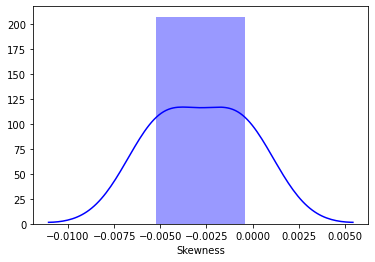

In [34]:
sns.distplot(df.skew(), color = 'blue', axlabel = 'Skewness')

A distplot infers the distribution of a variable

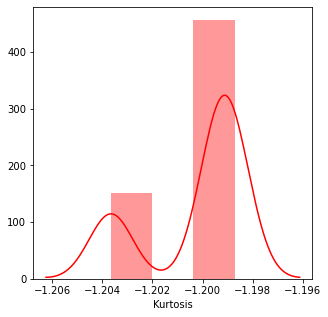

In [35]:
plt.figure(figsize = (5, 5))
sns.distplot(df.kurt(), color = 'r', axlabel = 'Kurtosis', norm_hist = False, kde = True, rug = False)
plt.show()

A heatmap shows the variation of a continuous value across two dimensions

Index(['Likes', 'Reposts', 'Comments', 'Shares'], dtype='object')


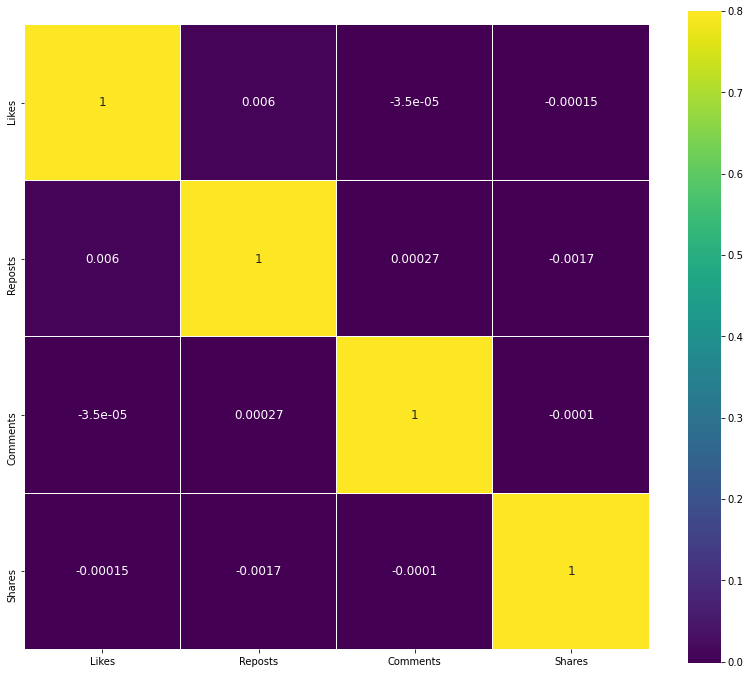

In [38]:
k= 11
correlation = numeric_features.corr()
cols = correlation.nlargest(k,'Likes')['Likes'].index
print(cols)
cm = np.corrcoef(df[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)